In [3]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

import numpy as np
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

from nltk.corpus import words
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import words as wd
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import *

from collections import Counter, OrderedDict
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import matplotlib.pyplot as plt
import pickle

In [4]:
stopwords = nltk.corpus.stopwords.words('english')

In [5]:
path = os.getcwd()+'/Genomics-Informatics-Corpus/raw_text2' 
filelist = os.listdir(path)

In [7]:
import natsort
new_filelist = natsort.natsorted(filelist,reverse=False)

In [8]:
title = []

under10_file = []
under10_title = []

upper10_file = []
upper10_title = []


for vol_no in range(1,17):
    filelist = []
    idx = 1
    for file in new_filelist:
        vol_check = file[4:6]
        vol_check = re.sub('-','',vol_check)
        
        if vol_check == str(vol_no):
            if vol_no <= 8:
                under10_file.append(file)
            elif vol_no>8:
                upper10_file.append(file)
            filelist.append(file)
                

            
    for tmp in filelist:
        if vol_no <= 8:
                under10_title.append("Vol."+str(vol_no)+'-'+str(idx))
                idx += 1
        elif vol_no>8:
                upper10_title.append("Vol."+str(vol_no)+'-'+str(idx))
                idx += 1

    
        

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [10]:
upper10_file

['gni-9-1-1.txt',
 'gni-9-1-5.txt',
 'gni-9-1-12.txt',
 'gni-9-1-19.txt',
 'gni-9-1-28.txt',
 'gni-9-1-37.txt',
 'gni-9-1-39.txt',
 'gni-9-2-45.txt',
 'gni-9-2-52.txt',
 'gni-9-2-59.txt',
 'gni-9-2-64.txt',
 'gni-9-2-69.txt',
 'gni-9-2-74.txt',
 'gni-9-2-79.txt',
 'gni-9-2-85.txt',
 'gni-9-2-89.txt',
 'gni-9-3-93.txt',
 'gni-9-3-102.txt',
 'gni-9-3-114.txt',
 'gni-9-3-121.txt',
 'gni-9-3-127.txt',
 'gni-9-3-134.txt',
 'gni-9-3-136.txt',
 'gni-9-3-138.txt',
 'gni-9-4-143.txt',
 'gni-9-4-152.txt',
 'gni-9-4-161.txt',
 'gni-9-4-173.txt',
 'gni-9-4-181.txt',
 'gni-9-4-189.txt',
 'gni-9-4-194.txt',
 'gni-9-4-197.txt',
 'gni-10-1.txt',
 'gni-10-9.txt',
 'gni-10-16.txt',
 'gni-10-23.txt',
 'gni-10-33.txt',
 'gni-10-40.txt',
 'gni-10-44.txt',
 'gni-10-51.txt',
 'gni-10-58.txt',
 'gni-10-65.txt',
 'gni-10-69.txt',
 'gni-10-74.txt',
 'gni-10-81.txt',
 'gni-10-88.txt',
 'gni-10-99.txt',
 'gni-10-106.txt',
 'gni-10-110.txt',
 'gni-10-117.txt',
 'gni-10-123.txt',
 'gni-10-128.txt',
 'gni-10-133.txt

In [11]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [12]:

#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []

gni_texts = []

#under10_file --> 바꾸기
for fn in under10_file :
    text = (PlaintextCorpusReader(path, fn, encoding='utf-16')).raw()
    gni_texts.append(text)
    
    
for text in gni_texts:    
    allwords_stemmed = tokenize_and_stem(text) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list

    allwords_tokenized = tokenize_only(text)
    totalvocab_tokenized.extend(allwords_tokenized)


In [13]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 759062 items in vocab_frame


In [14]:
print (vocab_frame.head())

                  words
minireview   minireview
genom          genomics
informat    informatics
vol                 vol
septemb       september


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(gni_texts) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/Users/sophienam/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 23.6 s, sys: 294 ms, total: 23.9 s
Wall time: 24.1 s
(243, 745)


In [16]:

terms = tfidf_vectorizer.get_feature_names()
terms

["'s",
 '*correspond',
 '*correspond author',
 '*correspond author e-mail',
 'a/.',
 'abil',
 'abl',
 'abov',
 'acad',
 'acad sci',
 'acad sci usa',
 'access',
 'accord',
 'accur',
 'acid',
 'acid res',
 'acknowledg work',
 'acknowledg work support',
 'activ',
 'ad',
 'addit',
 'adjust',
 'advanc',
 'advantag',
 'affect',
 'age',
 'aim',
 'al',
 'al.',
 'algorithm',
 'align',
 'allel',
 'allow',
 'alter',
 'amino',
 'amino acid',
 'amplifi',
 'analys',
 'analyz',
 'ani',
 'annot',
 'anoth',
 'appear',
 'appli',
 'applic',
 'approach',
 'appropri',
 'approxim',
 'area',
 'array',
 'assay',
 'assembl',
 'assess',
 'assign',
 'associ',
 'associ studi',
 'assum',
 'autom',
 'avail',
 'averag',
 'b',
 'b.',
 'basi',
 'basic',
 'becaus',
 'becom',
 'befor',
 'best',
 'better',
 'bind',
 'biochem',
 'bioinformat',
 'biol',
 'biolog',
 'biotechnolog',
 'block',
 'blood',
 'box',
 'bp',
 'build',
 'c',
 'ca',
 'calcul',
 'cancer',
 'candid',
 'carri',
 'case',
 'caus',
 'cdna',
 'cell',
 'cellu

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [18]:
from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 8.27 s, sys: 47.3 ms, total: 8.32 s
Wall time: 4.29 s


In [19]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster_under10.pkl')

#km = joblib.load('doc_cluster10.pkl')
clusters = km.labels_.tolist()

/Users/sophienam/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
gnipaper = { 'filename':under10_file,'title': under10_title,'text': gni_texts, 'cluster': clusters }

frame = pd.DataFrame(gnipaper, index = [clusters] , columns = [ 'filename','title', 'cluster'])

In [21]:
frame['cluster'].value_counts()

0    66
4    55
2    34
5    33
1    33
3    14
6     8
Name: cluster, dtype: int64

In [22]:

from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 


for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    print()
    count = 0
    for ind in order_centroids[i, :5]: #replace 6 with n words per cluster 
        
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        print(len(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore')))
        
        
        if len(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore')) <= 2:
            count+=1
            print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['filename'].values.tolist():
        print(' %s,' % title, end='')
        
    print() #add whitespace
    print() #add whitespace
    print('==추가==')
    if count != 0:
        for j in range(0,count+10):
            print(' %s' % vocab_frame.ix[terms[j].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')


    print() #add whitespace
    print() #add whitespace
    

    
print()
print()

Top terms per cluster:

Cluster 0 words:
 b'snps',4
 b'associated',10


/Users/sophienam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/sophienam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/sophienam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-dep

 b'et',2
Cluster 0 titles: b'al',2
Cluster 0 titles: b"genotypes'",10
 gni-2-1-1.txt, gni-2-2-81.txt, gni-2-2-107.txt, gni-2-3-126.txt, gni-3-1-1.txt, gni-3-3-74.txt, gni-3-4-149.txt, gni-3-4-159.txt, gni-3-4-166.txt, gni-4-1-45.txt, gni-4-2-51.txt, gni-4-3-103.txt, gni-5-2-41.txt, gni-5-2-56.txt, gni-5-2-61.txt, gni-5-2-68.txt, gni-5-4-152.txt, gni-5-4-161.txt, gni-5-4-168.txt, gni-5-4-188.txt, gni-6-1-1.txt, gni-6-1-8.txt, gni-6-1-14.txt, gni-6-1-18.txt, gni-6-1-29.txt, gni-6-2-57.txt, gni-6-2-77.txt, gni-6-2-91.txt, gni-6-3-99.txt, gni-6-3-110.txt, gni-6-3-130.txt, gni-6-3-153.txt, gni-6-4-166.txt, gni-6-4-173.txt, gni-6-4-181.txt, gni-6-4-192.txt, gni-7-1-1.txt, gni-7-1-13.txt, gni-7-1-20.txt, gni-7-1-32.txt, gni-7-2-53.txt, gni-7-2-57.txt, gni-7-2-107.txt, gni-7-2-136.txt, gni-7-3-148.txt, gni-7-3-152.txt, gni-7-4-187.txt, gni-7-4-195.txt, gni-8-1-1.txt, gni-8-1-9.txt, gni-8-1-19.txt, gni-8-2-76.txt, gni-8-2-81.txt, gni-8-3-101.txt, gni-8-3-103.txt, gni-8-3-108.txt, gni-8-3-116.tx

/Users/sophienam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/Users/sophienam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


 b'ability', b'able', b'above', b'acad', b'acad', b'acad', b'accessed',

Cluster 1 words:
 b'microarrays',11
 b'clustering',10
 b'arrays',6
 b'expression',10
 b'normal',6
 gni-1-1-20.txt, gni-1-1-25.txt, gni-1-1-32.txt, gni-1-2-65.txt, gni-1-2-80.txt, gni-1-2-87.txt, gni-1-2-94.txt, gni-2-1-7.txt, gni-2-1-30.txt, gni-2-1-53.txt, gni-2-2-92.txt, gni-2-3-113.txt, gni-2-3-121.txt, gni-2-3-131.txt, gni-2-4-180.txt, gni-3-1-39.txt, gni-4-1-33.txt, gni-4-1-40.txt, gni-4-3-110.txt, gni-4-3-129.txt, gni-5-1-10.txt, gni-5-1-19.txt, gni-5-2-83.txt, gni-5-3-95.txt, gni-5-3-113.txt, gni-5-3-118.txt, gni-5-3-129.txt, gni-5-3-133.txt, gni-5-3-137.txt, gni-6-3-126.txt, gni-6-3-136.txt, gni-6-4-231.txt, gni-8-3-138.txt,

==추가==


Cluster 2 words:
 b'databases',9
 b'sequence',8
 b'users',5
 b'search',6
 b'web',3
 gni-2-3-142.txt, gni-2-3-147.txt, gni-3-1-35.txt, gni-3-2-73.txt, gni-3-3-68.txt, gni-3-3-86.txt, gni-3-3-94.txt, gni-4-3-125.txt, gni-4-4-167.txt, gni-4-4-170.txt, gni-4-4-173.txt, gni-5-1-30

In [23]:

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [21]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#b2182b', 6:'#3f007d',8:'#8dd3c7', 7:'#f1a340',9:'#35978f'}
#set up cluster names using a dict
cluster_names = {0: 'Cluster 1', 
                 1: 'Cluster 2', 
                 2: 'Cluster 3', 
                 3: 'Cluster 4', 
                 4: 'Cluster 5',
                 5: 'Cluster 6', 
                 6: 'Cluster 7', 
                 7: 'Cluster 8', 
                 8: 'Cluster 9',
                 9: 'Cluster 10'}

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


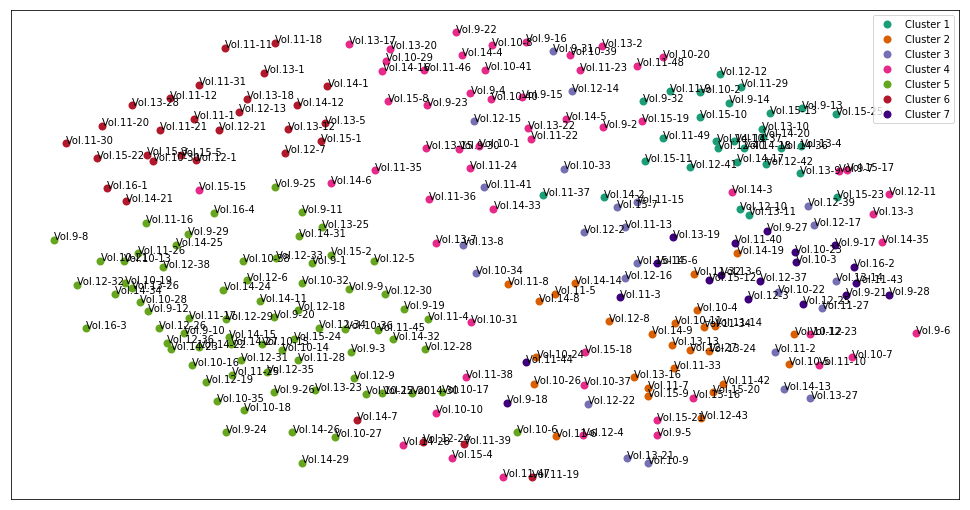

In [23]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=upper10_title)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, label=cluster_names[name], color=cluster_colors[name],  mec='none')
           
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=10)  

    
    
plt.savefig('clusters_7_Upper2010.png', dpi=200)
plt.show() #show the plot

#uncomment the below to save the plot if need be


In [24]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [25]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=upper10_title)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


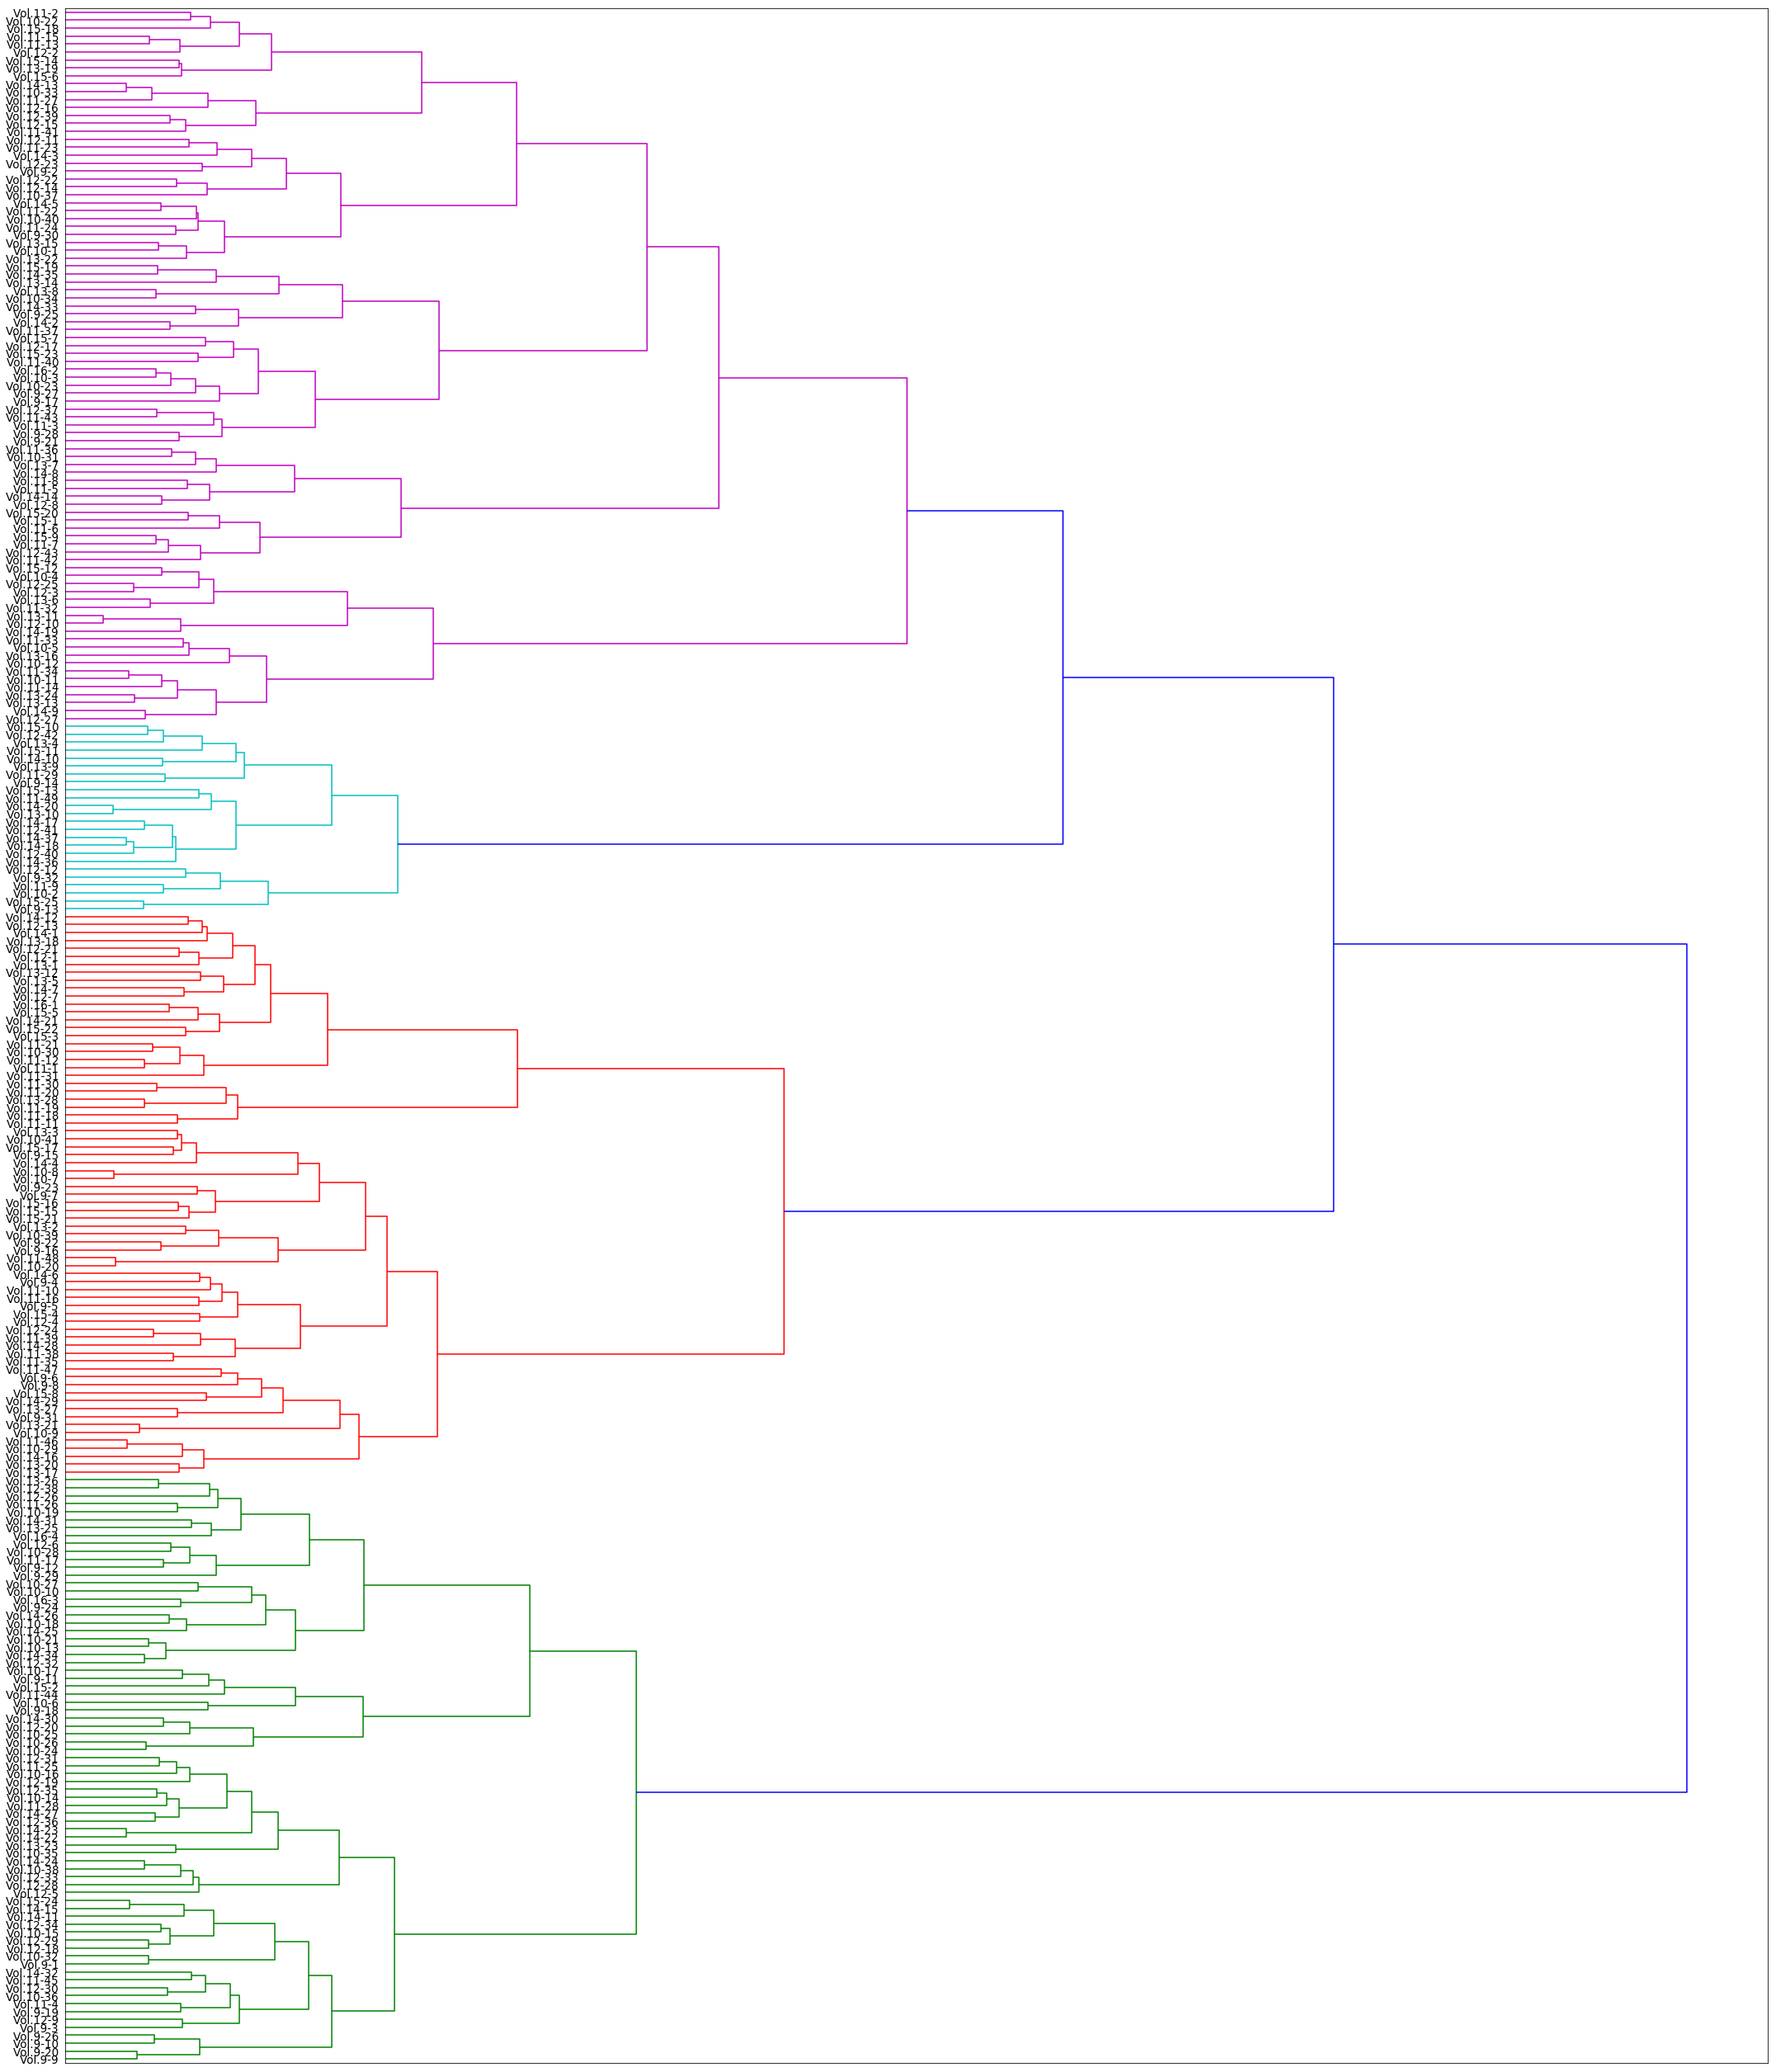

In [26]:

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(30, 35)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=upper10_title, color_threshold=10, leaf_font_size = 13.5);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize = 100,
)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_Upper10.png', dpi=200) #save figure as ward_clusters

In [ ]:
linkage_matrix

In [ ]:
len(filelist)